In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, QuantileTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA
import tensorflow_decision_forests as tfdf
import lightgbm as lgb
import scipy.stats as st


2024-02-06 22:21:28.748739: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-06 22:21:28.782255: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 22:21:28.782280: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 22:21:28.783239: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-06 22:21:28.788307: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-06 22:21:28.788930: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
dataset_train = pd.read_csv('/home/drago/Documents/Predict_price/train.csv',sep=',')
dataset_test = pd.read_csv('/home/drago/Documents/Predict_price/test.csv',sep=',')

In [4]:
dataset_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
dataset_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## 1 Cleaning data


In [6]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
dataset_train.isna().mean()


Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [8]:
mask = dataset_train.isna().mean() < 0.5
dataset_train.loc[:10]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [9]:
dataset_train.loc[:,mask[mask.values == 0].index].isna().mean()

Alley          0.937671
MasVnrType     0.597260
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

In [10]:
cols = mask[mask].index
df_train = dataset_train.loc[:,cols]
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
df_train.ScreenPorch.sort_values(ascending=False)

1328    480
1386    440
185     410
426     396
625     385
       ... 
506       0
505       0
504       0
502       0
1459      0
Name: ScreenPorch, Length: 1460, dtype: int64

<AxesSubplot:>

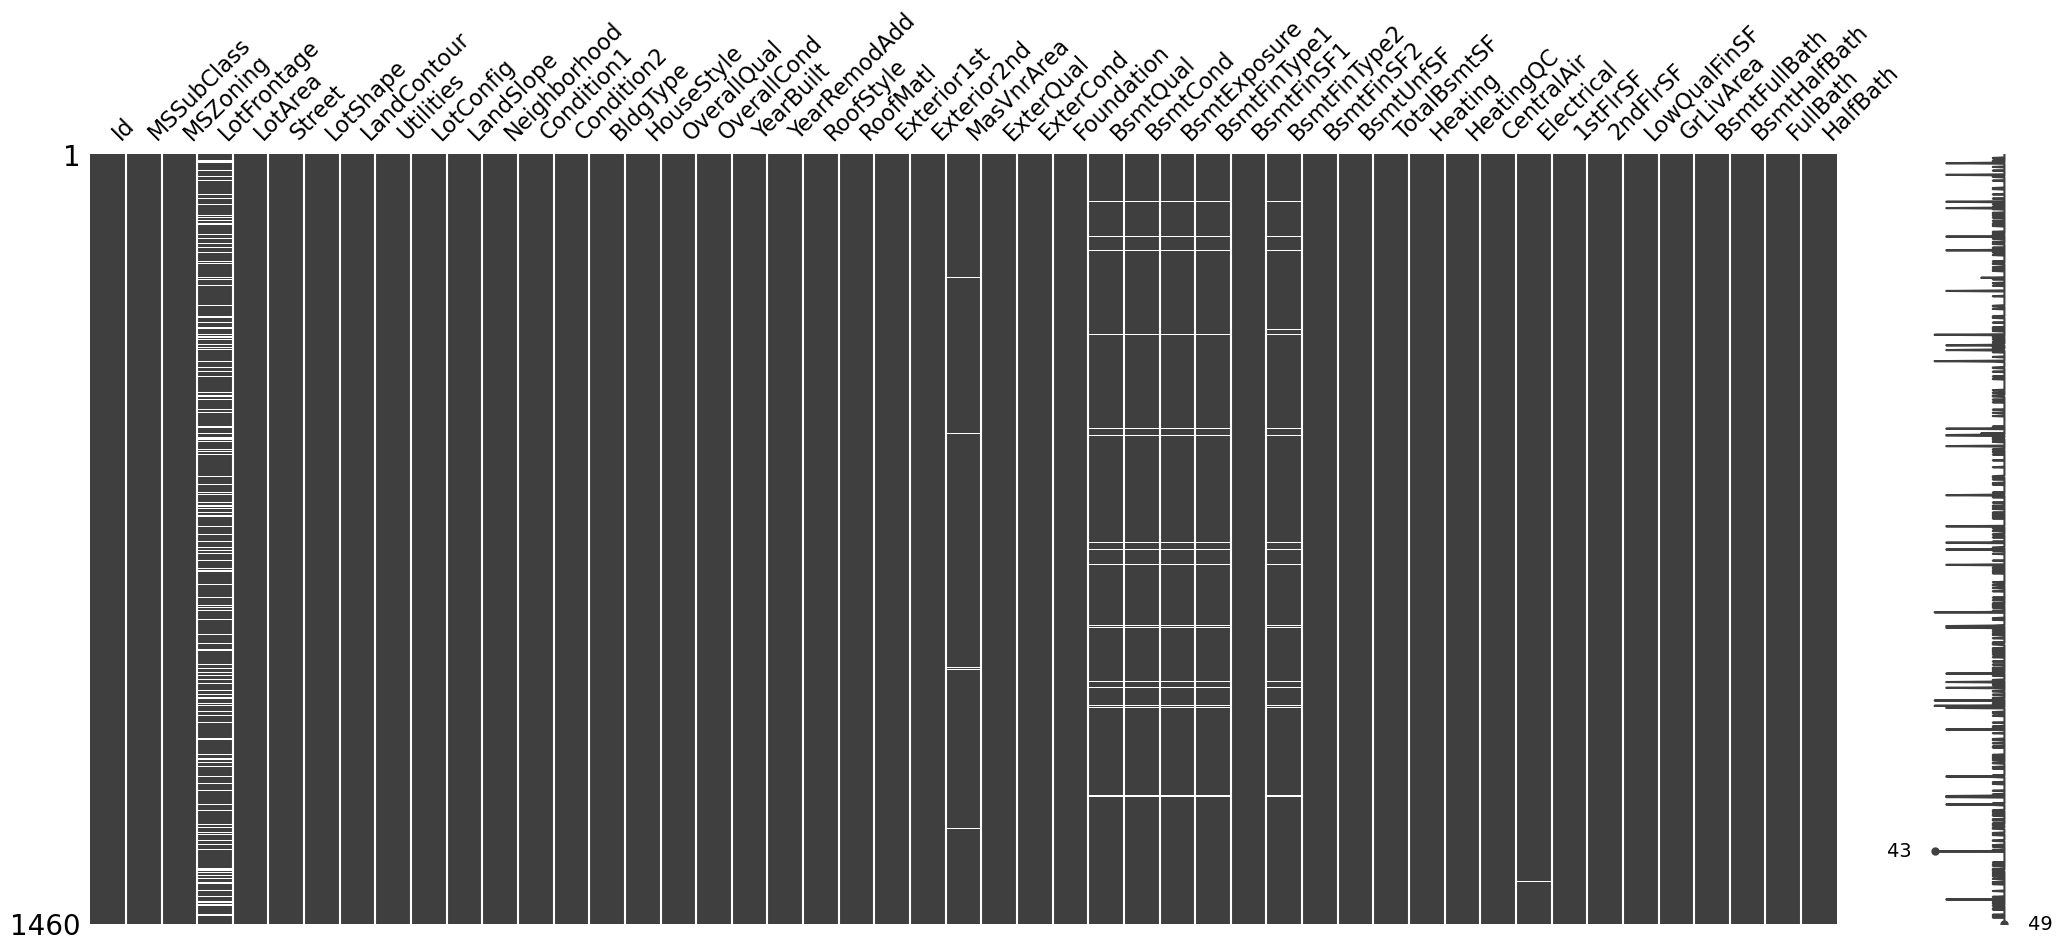

In [12]:
msno.matrix(df_train.iloc[:,:49])

<AxesSubplot:>

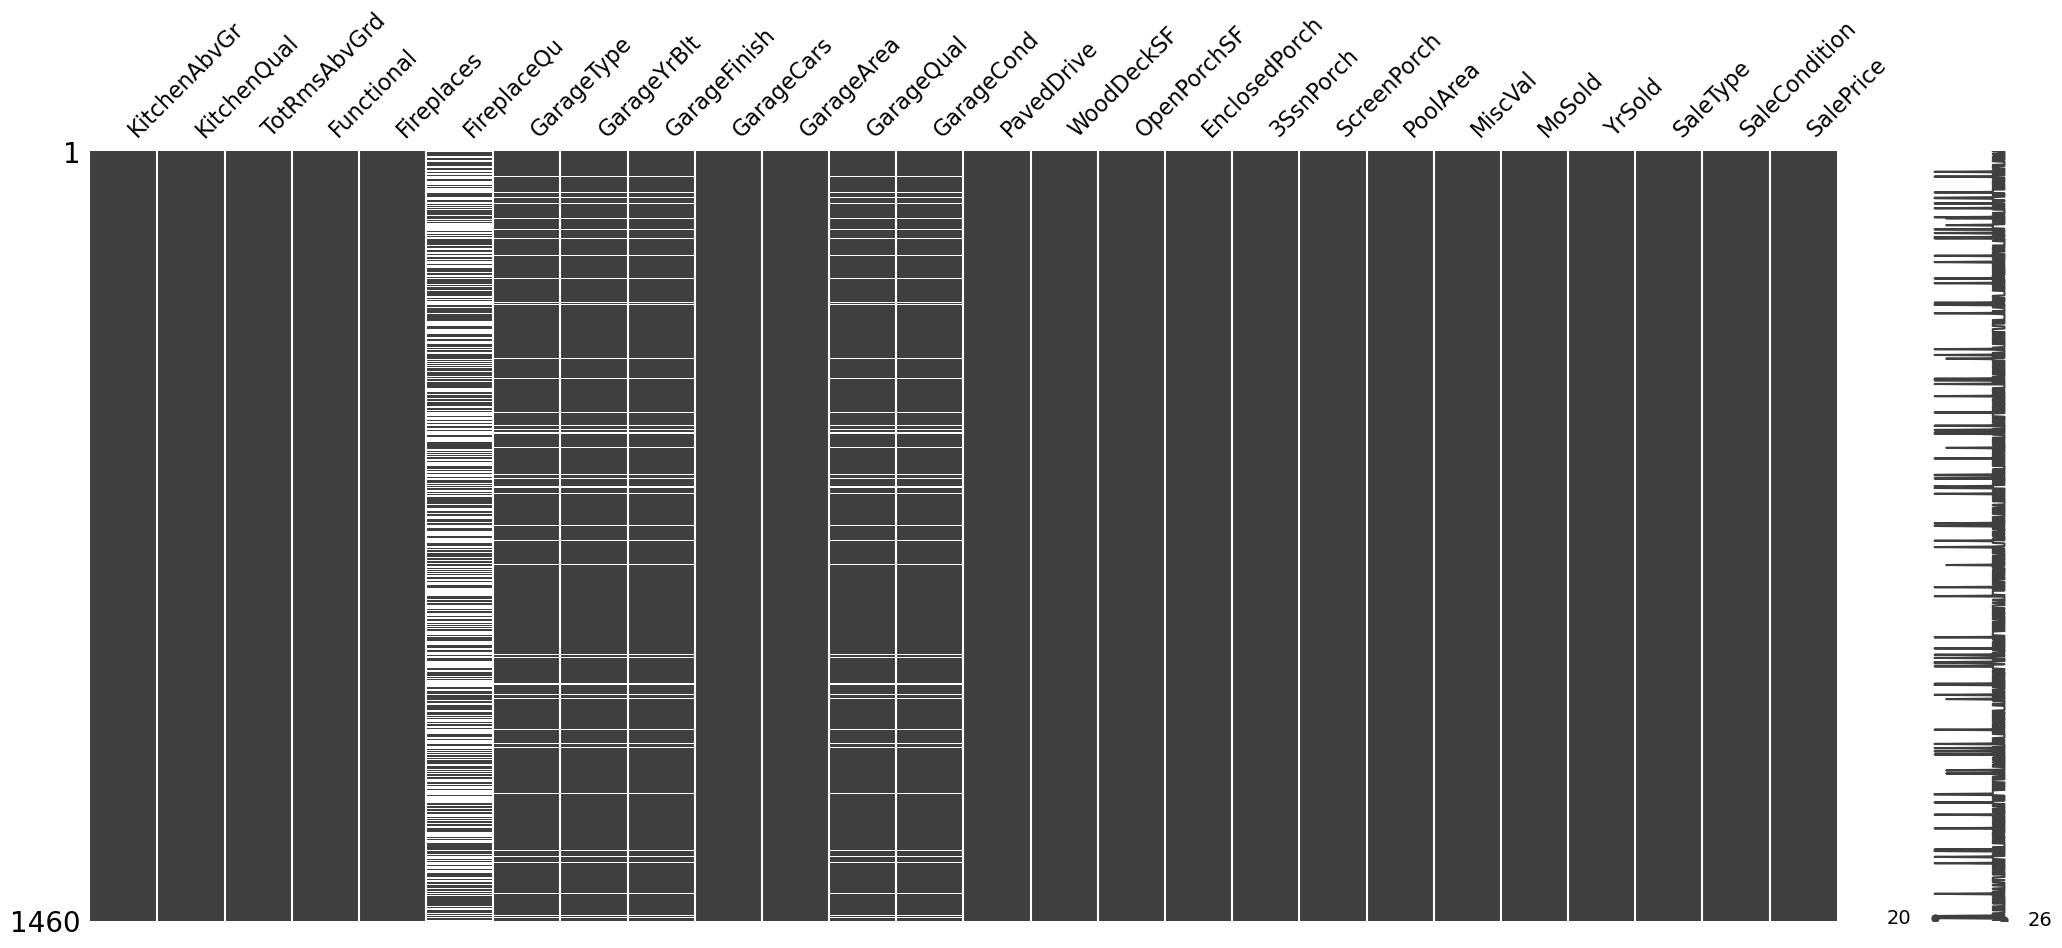

In [13]:
msno.matrix(df_train.iloc[:,50:76])

### Delete missing variables 

I delete the missing variables > 0.5

- FireplaceQu
- LotFrontage


In [14]:
cols_drop = ['FireplaceQu','LotFrontage']
df_train = df_train.loc[:,~df_train.columns.isin(cols_drop)]
df_train = df_train.dropna()
df_train.isna().mean()

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 74, dtype: float64


## 2 Data Exploration

- Encode categorial variables
- Aberrant variables
- Deleting the variable with low variance 



In [15]:
df_train.drop(columns='Id', inplace=True)

In [16]:
df_train

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
cols_categorial = df_train.select_dtypes(exclude=np.number).columns
cols_not_categorial = df_train.select_dtypes(include=np.number).columns

In [19]:
def encode_variable(colonne, df = object):
    le = LabelEncoder()
    for col in colonne:
        df[col] = le.fit_transform(df[col])
    return df

In [20]:
df_train = encode_variable(cols_categorial, df_train)
df_train

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,1,3,3,0,4,0,8,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,13175,1,3,3,0,4,0,14,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,9042,1,3,3,0,4,0,6,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,9717,1,3,3,0,4,0,12,...,112,0,0,0,0,4,2010,8,4,142125


In [21]:
df_train.select_dtypes(include=np.number)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,1,3,3,0,4,0,8,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,13175,1,3,3,0,4,0,14,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,9042,1,3,3,0,4,0,6,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,9717,1,3,3,0,4,0,12,...,112,0,0,0,0,4,2010,8,4,142125


In [22]:
le = LabelEncoder()

In [23]:
df_train.loc[:,['GrLivArea','1stFlrSF','2ndFlrSF','LowQualFinSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'SalePrice']]

,GrLivArea,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice
0,1710,856,854,0,706,0,150,856,208500
1,1262,1262,0,0,978,0,284,1262,181500
2,1786,920,866,0,486,0,434,920,223500
3,1717,961,756,0,216,0,540,756,140000
4,2198,1145,1053,0,655,0,490,1145,250000
...,...,...,...,...,...,...,...,...,...
1455,1647,953,694,0,0,0,953,953,175000
1456,2073,2073,0,0,790,163,589,1542,210000
1457,2340,1188,1152,0,275,0,877,1152,266500
1458,1078,1078,0,0,49,1029,0,1078,142125


In [24]:
df_train.loc[df_train['1stFlrSF'] != df_train.TotalBsmtSF, ['GrLivArea','1stFlrSF','2ndFlrSF','LowQualFinSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'SalePrice']]

,GrLivArea,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice
3,1717,961,756,0,216,0,540,756,140000
6,1694,1694,0,0,1369,0,317,1686,307000
8,1774,1022,752,0,0,0,952,952,129900
9,1077,1077,0,0,851,0,140,991,118000
11,2324,1182,1142,0,998,0,177,1175,345000
...,...,...,...,...,...,...,...,...,...
1448,1346,796,550,0,0,0,560,560,112000
1451,1578,1578,0,0,0,0,1573,1573,287090
1452,1072,1072,0,0,547,0,0,547,145000
1456,2073,2073,0,0,790,163,589,1542,210000


In [25]:
df_train.drop(columns=['1stFlrSF','2ndFlrSF','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], inplace=True)
df_train

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,1,3,3,0,4,0,8,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,13175,1,3,3,0,4,0,14,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,9042,1,3,3,0,4,0,6,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,9717,1,3,3,0,4,0,12,...,112,0,0,0,0,4,2010,8,4,142125


### Redundant variables

- TotalBsmtSF (Total square feet of basement area) = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF
- GrLivArea (Above grade (ground) living area square feet) = 1stFlrSF + 2ndFlrSF
- I remove the variables : "BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, 1stFlrSF, 2ndFlrSF 

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'MSZoning'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'Street'}>,
        <AxesSubplot:title={'center':'LotShape'}>,
        <AxesSubplot:title={'center':'LandContour'}>,
        <AxesSubplot:title={'center':'Utilities'}>,
        <AxesSubplot:title={'center':'LotConfig'}>],
       [<AxesSubplot:title={'center':'LandSlope'}>,
        <AxesSubplot:title={'center':'Neighborhood'}>,
        <AxesSubplot:title={'center':'Condition1'}>,
        <AxesSubplot:title={'center':'Condition2'}>,
        <AxesSubplot:title={'center':'BldgType'}>,
        <AxesSubplot:title={'center':'HouseStyle'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'RoofStyle'}>,
  

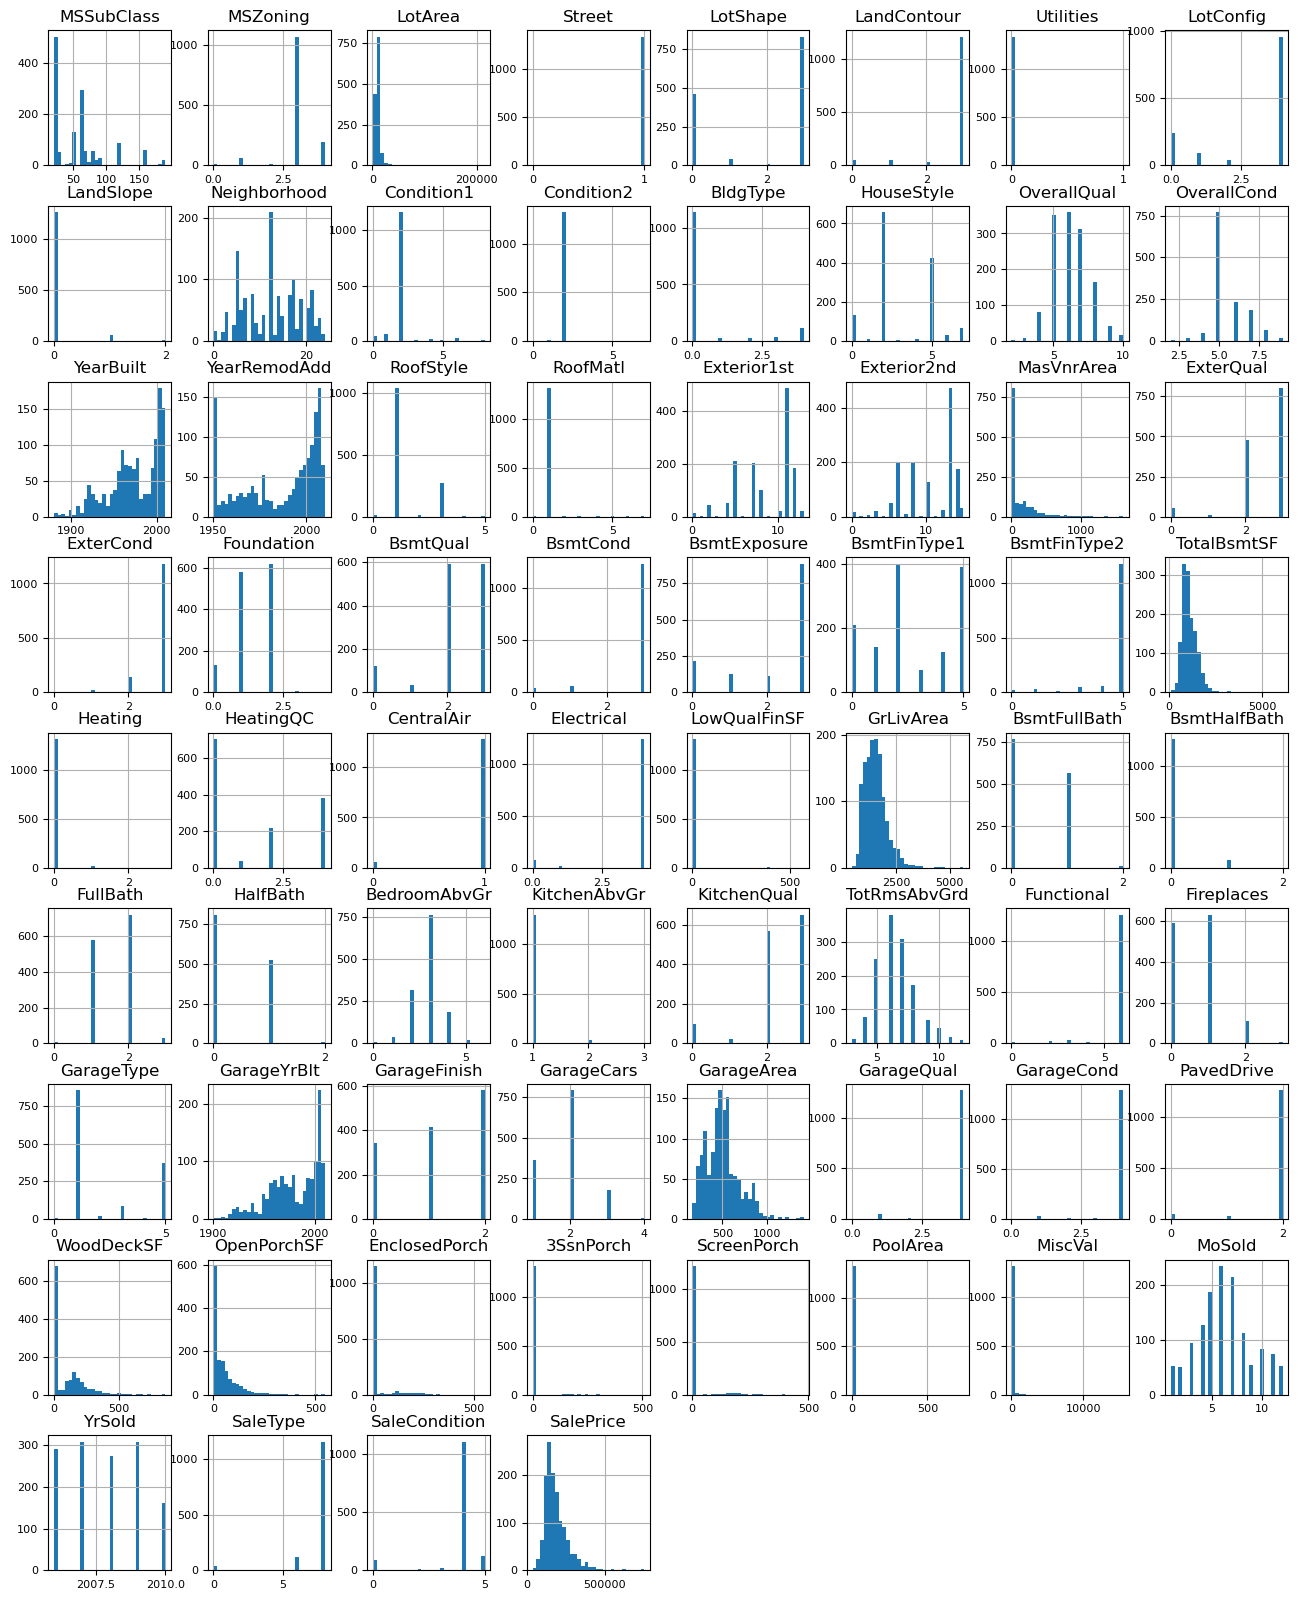

In [26]:
# variables vizualisation 
df_train.hist(figsize=(16, 20), bins=30, xlabelsize=8, ylabelsize=8)

In [27]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd


def threshold_variance(data):

    df = pd.DataFrame(data)

    X = df.values

    your_threshold = 0.1

    selector = VarianceThreshold(threshold=your_threshold)

    X_high_variance = selector.fit_transform(X)

    mask = selector.get_support()
    
    selected_features = df.columns[mask]
    print("Selected features:", selected_features)

    removed_features = df.columns[~mask]
    print("Removed features:", removed_features)


    return selected_features

selected_features = threshold_variance(df_train)

Selected features: Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', 'HeatingQC',
       'Electrical', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')
Removed features: Index(['Street',

In [28]:
df_train = df_train.loc[:,selected_features]
df_train

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,3,3,4,5,2,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,3,3,2,24,1,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,0,3,4,5,2,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,0,3,0,6,2,0,5,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,0,3,2,15,2,0,5,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,3,3,4,8,2,0,5,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,13175,3,3,4,14,2,0,2,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,9042,3,3,4,6,2,0,5,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,9717,3,3,4,12,2,0,2,...,112,0,0,0,0,4,2010,8,4,142125


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

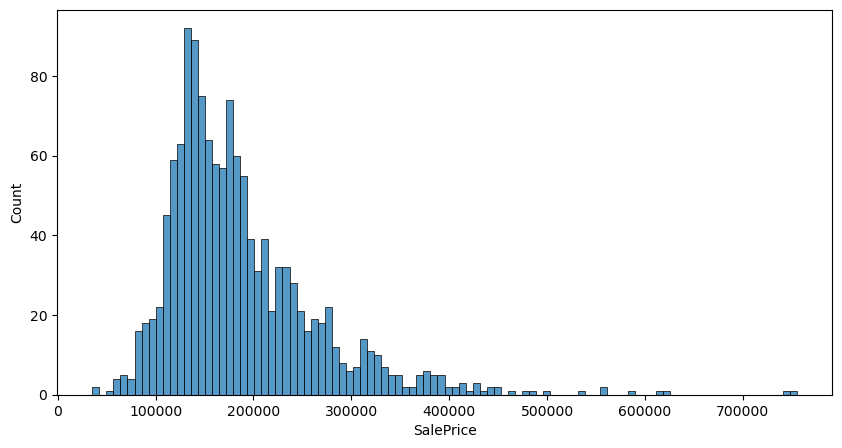

In [29]:
fig, ax = plt.subplots(figsize = (10,5))
sns.histplot(df_train['SalePrice'],  bins=100)


In [30]:
cols_categorial = cols_categorial[~cols_categorial.isin(['Street', 'Utilities', 'LandSlope', 'Condition2', 'Heating', 'CentralAir',
                                                         'BsmtHalfBath', 'KitchenAbvGr','1stFlrSF','2ndFlrSF','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'])]
cols_categorial

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [31]:
cols_not_categorial = cols_not_categorial[~cols_not_categorial.isin(['Street', 'Utilities', 'LandSlope', 'Condition2', 'Heating', 'CentralAir',
                                                                     'BsmtHalfBath', 'KitchenAbvGr','1stFlrSF','2ndFlrSF','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'])]
cols_not_categorial

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Searching for outliers

In [32]:
df_train.iloc[:,:20].describe()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,56.136024,3.023916,10706.294469,1.903587,2.787743,3.001495,12.374439,2.053064,0.478326,3.094918,6.219731,5.596413,1973.029148,1985.668909,1.425262,1.076233,8.668161,10.360987,110.360239,2.518685
std,41.252576,0.624383,10336.621126,1.419114,0.687379,1.630854,6.048137,0.886714,1.211350,1.914974,1.324472,1.078124,29.563540,20.296463,0.844280,0.606758,3.099529,3.499828,185.604816,0.699414
min,20.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,3.000000,7744.000000,0.000000,3.000000,2.000000,7.000000,2.000000,0.000000,2.000000,5.000000,5.000000,1956.000000,1968.000000,1.000000,1.000000,7.000000,8.000000,0.000000,2.000000
50%,50.000000,3.000000,9600.000000,3.000000,3.000000,4.000000,12.000000,2.000000,0.000000,2.000000,6.000000,5.000000,1976.000000,1994.500000,1.000000,1.000000,11.000000,13.000000,0.000000,3.000000
75%,70.000000,3.000000,11760.750000,3.000000,3.000000,4.000000,17.000000,2.000000,0.000000,5.000000,7.000000,6.000000,2001.000000,2004.000000,1.000000,1.000000,11.000000,13.000000,174.000000,3.000000
max,190.000000,4.000000,215245.000000,3.000000,3.000000,4.000000,24.000000,8.000000,4.000000,7.000000,10.000000,9.000000,2010.000000,2010.000000,5.000000,7.000000,13.000000,15.000000,1600.000000,3.000000


In [33]:
df_train.iloc[:,20:40].describe()

,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,2.869208,1.382661,2.240658,2.821375,2.249626,2.699552,4.698057,1095.947683,1.489537,3.730942,4.221973,1537.585202,0.438714,1.575486,0.402840,2.864723,2.323617,6.550075,5.772048,0.648729
std,0.382988,0.672172,0.877078,0.640393,1.154687,1.818055,0.951327,405.554435,1.734932,0.978887,40.712916,520.579960,0.515630,0.547570,0.504185,0.776677,0.829916,1.585071,0.928834,0.645393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,5.000000,819.750000,0.000000,4.000000,0.000000,1160.000000,0.000000,1.000000,0.000000,2.000000,2.000000,5.000000,6.000000,0.000000
50%,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,5.000000,1021.500000,0.000000,4.000000,0.000000,1480.000000,0.000000,2.000000,0.000000,3.000000,2.000000,6.000000,6.000000,1.000000
75%,3.000000,2.000000,3.000000,3.000000,3.000000,5.000000,5.000000,1324.000000,4.000000,4.000000,0.000000,1791.500000,1.000000,2.000000,1.000000,3.000000,3.000000,7.000000,6.000000,1.000000
max,3.000000,4.000000,3.000000,3.000000,3.000000,5.000000,5.000000,6110.000000,4.000000,4.000000,572.000000,5642.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,6.000000,3.000000


In [34]:
df_train.iloc[:,40:60].describe()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,2.255605,1978.596413,1.175635,1.87145,501.449925,3.860239,3.901345,1.899103,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,2007.805680,7.500000,3.804933,186761.782511
std,1.777147,24.773741,0.813005,0.63428,186.761863,0.619349,0.518165,0.414201,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,1.330691,1.580666,1.059942,78913.847668
min,0.000000,1900.000000,0.000000,1.00000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,35311.000000
25%,1.000000,1962.000000,0.000000,1.00000,377.500000,4.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,135000.000000
50%,1.000000,1980.000000,1.000000,2.00000,484.000000,4.000000,4.000000,2.000000,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,168500.000000
75%,5.000000,2002.000000,2.000000,2.00000,583.000000,4.000000,4.000000,2.000000,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,220000.000000
max,5.000000,2010.000000,2.000000,4.00000,1418.000000,4.000000,4.000000,2.000000,857.000000,547.000000,552.000000,508.000000,480.00000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


In [35]:
df_train.loc[df_train.LotArea >100000,['GrLivArea','SalePrice']]

,GrLivArea,SalePrice
249,2144,277000
313,2036,375000
335,1786,228950
706,1824,302000


In [36]:
df_train.loc[df_train.TotalBsmtSF > 3000]

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,20,3,15431,3,3,4,16,2,0,2,...,0,0,170,0,0,4,2009,8,4,555000
496,20,3,12692,0,3,4,15,2,0,2,...,291,0,0,0,0,5,2007,8,4,430000
523,60,3,40094,0,0,4,7,4,0,5,...,0,0,0,0,0,10,2007,6,5,184750
1298,60,3,63887,2,0,0,7,1,0,5,...,0,0,0,480,0,1,2008,6,5,160000


In [37]:
# filter the outliers variables
df_train.loc[:,['MasVnrArea','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','LotArea','TotalBsmtSF']].describe()

,MasVnrArea,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,LotArea,TotalBsmtSF
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000
mean,110.360239,47.782511,21.263827,3.585949,16.43423,3.010463,10706.294469,1095.947683
std,185.604816,65.362562,60.843964,30.224622,58.05159,41.961337,10336.621126,405.554435
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1300.000000,105.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,7744.000000,819.750000
50%,0.000000,28.000000,0.000000,0.000000,0.00000,0.000000,9600.000000,1021.500000
75%,174.000000,70.000000,0.000000,0.000000,0.00000,0.000000,11760.750000,1324.000000
max,1600.000000,547.000000,552.000000,508.000000,480.00000,738.000000,215245.000000,6110.000000


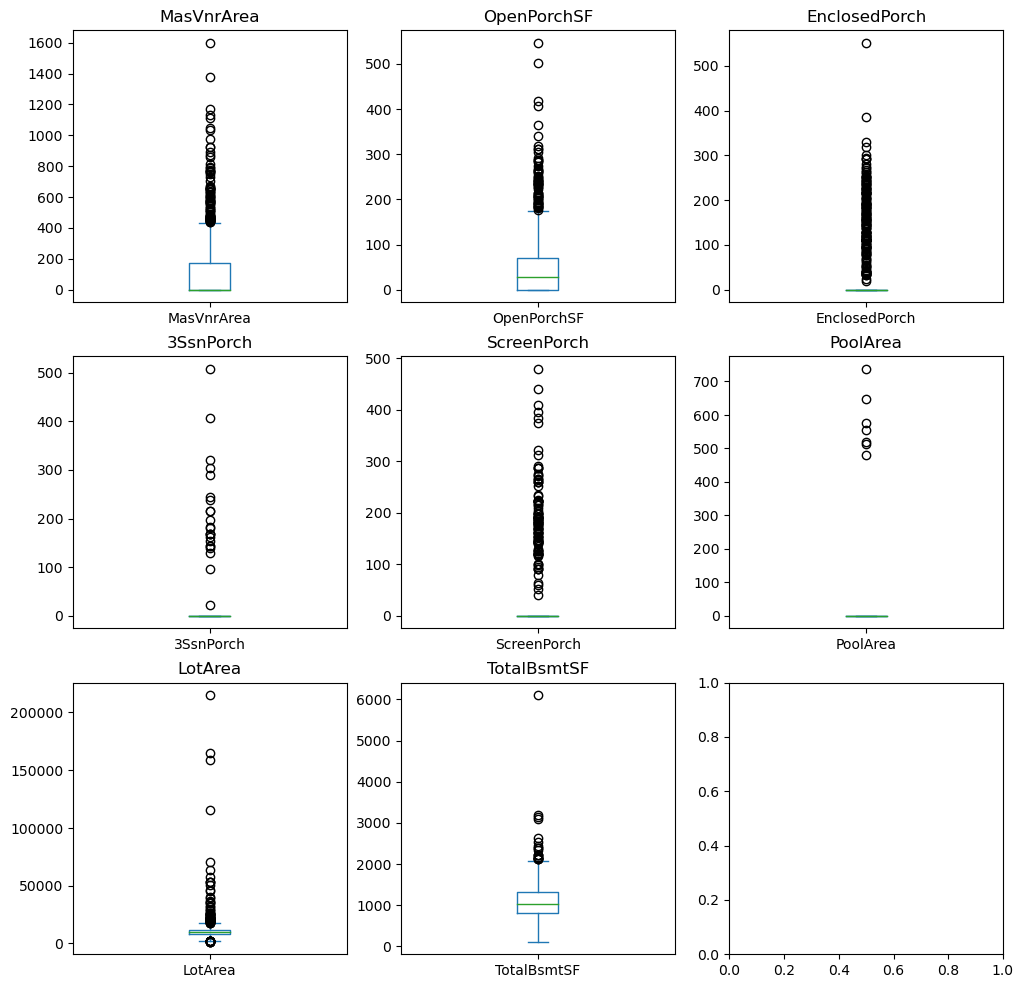

In [38]:
columns_to_plot = ['MasVnrArea','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','LotArea','TotalBsmtSF']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    df_train[col].plot.box(ax=axs[i])
    axs[i].set_title(col)

##### About outliers (extremes and aberrants values) observations
- The values of LotArea variable are between 1300 and 11000 and some values are greater at 11 000 feet square. 
- The values of MasVnrArea (Masonry veneer area in square feet) variable are between 0 and 400 and some values are greater than 400.
- The values of OpenPorchSF variable is egal 0 and some values are greater at 70 feet square. 
- In the majority the values of EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea variables are between 0 and 10 and some values are greater at 10 feet square. 
- The values of TotalBsmtSF variable are between 105 and 1024 and some values are greater at 1024 feet square. 




### Variables with high corrrelation


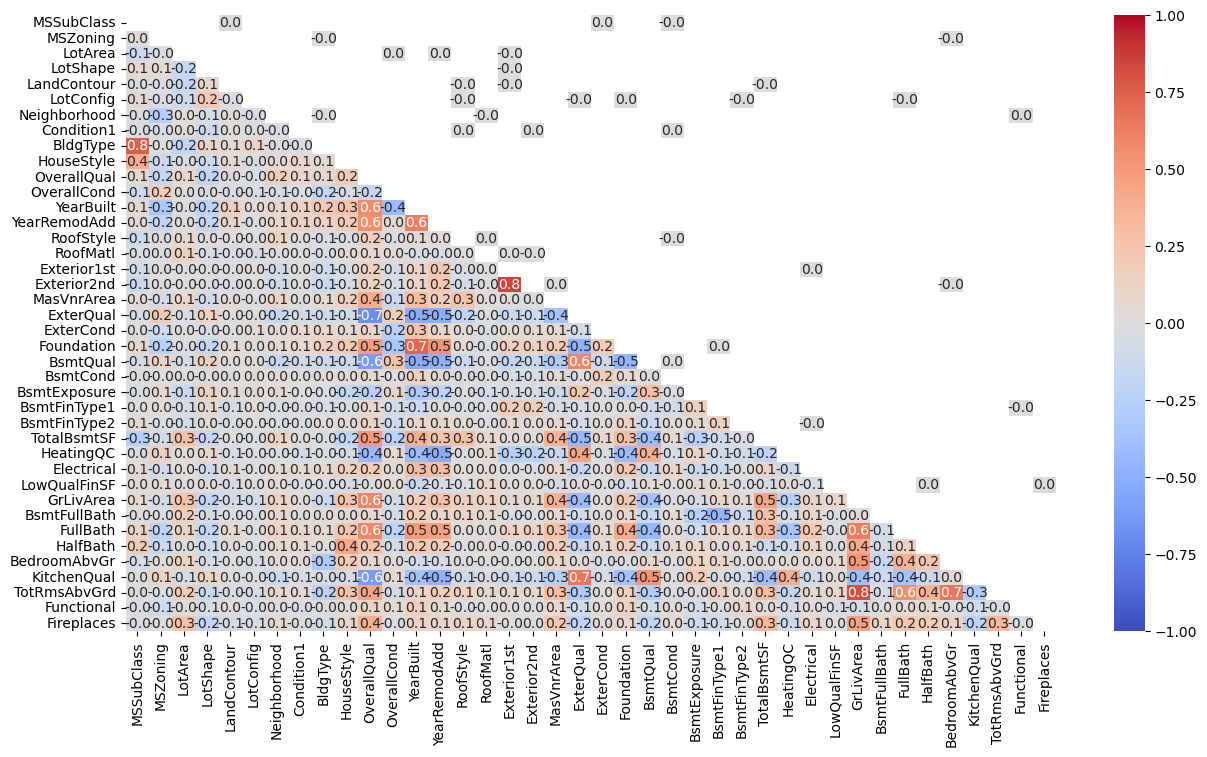

In [39]:
corr = df_train.iloc[:,:40].corr().round(2)
mask = np.triu(corr)
plt.figure(figsize=(15, 8))
sns.heatmap(data =corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm',fmt='.1f',mask = mask)
plt.show()

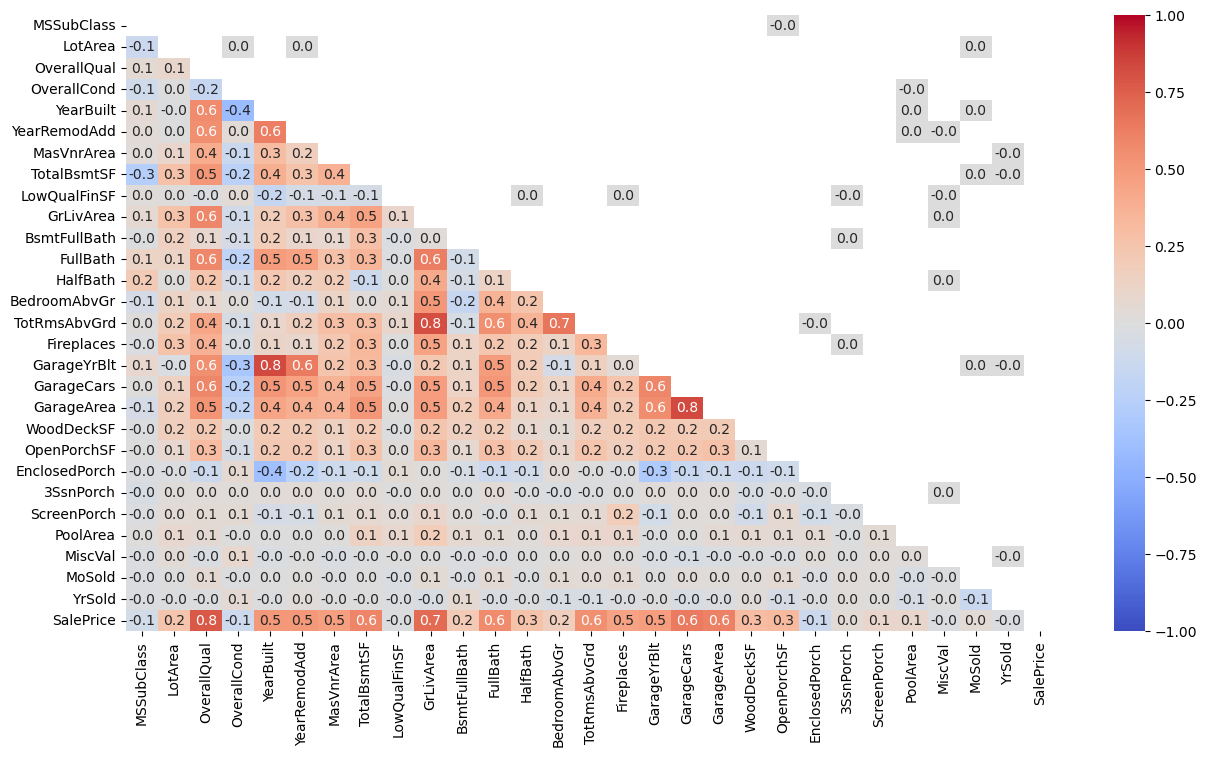

In [40]:
corr = df_train.loc[:, cols_not_categorial].corr().round(2)
mask = np.triu(corr)
plt.figure(figsize=(15, 8))
sns.heatmap(data =corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm',fmt='.1f',mask = mask)
plt.show()

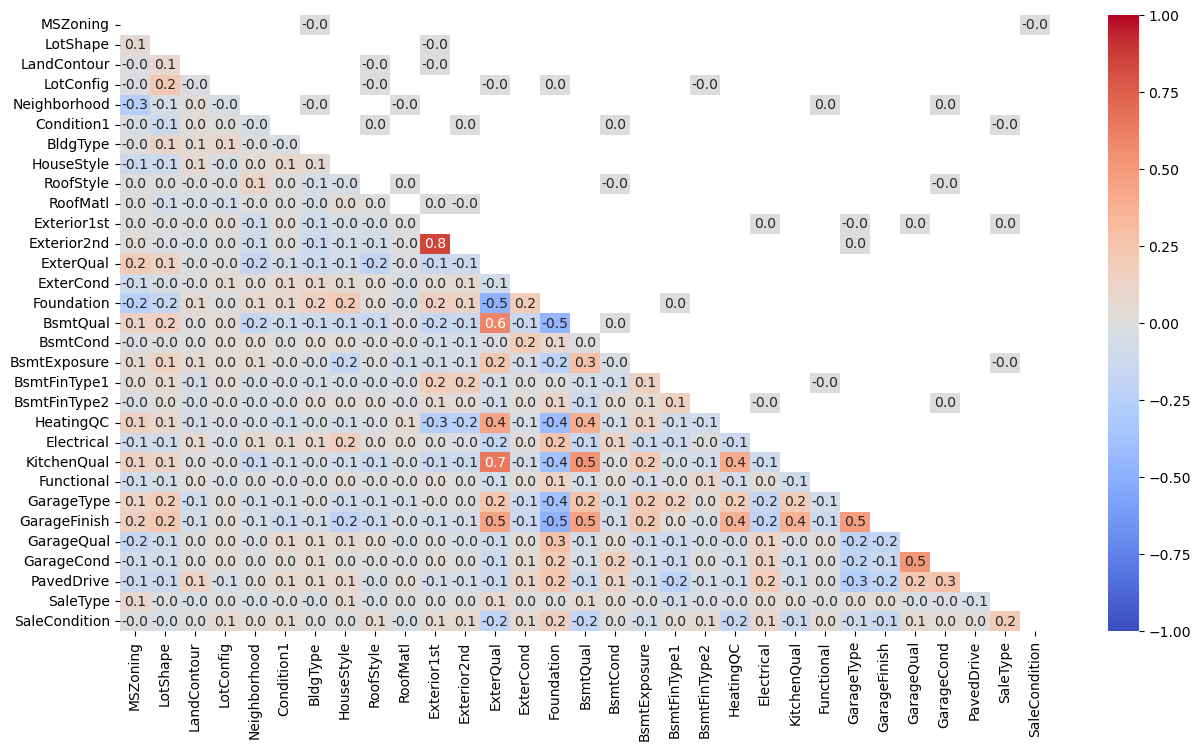

In [41]:
corr = df_train.loc[:, cols_categorial].corr().round(2)
mask = np.triu(corr)
plt.figure(figsize=(15, 8))
sns.heatmap(data =corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm',fmt='.1f',mask = mask)
plt.show()

## models

- Evaluate the models with Grid Search CV
- Search the hyperparameter of the best model with grid search CV  

In [42]:
X = df_train.iloc[:,:-1]
y = df_train.SalePrice
X

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,8450,3,3,4,5,2,0,5,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,9600,3,3,2,24,1,0,2,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,11250,0,3,4,5,2,0,5,...,42,0,0,0,0,0,9,2008,8,4
3,70,3,9550,0,3,0,6,2,0,5,...,35,272,0,0,0,0,2,2006,8,0
4,60,3,14260,0,3,2,15,2,0,5,...,84,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,3,3,4,8,2,0,5,...,40,0,0,0,0,0,8,2007,8,4
1456,20,3,13175,3,3,4,14,2,0,2,...,0,0,0,0,0,0,2,2010,8,4
1457,70,3,9042,3,3,4,6,2,0,5,...,60,0,0,0,0,2500,5,2010,8,4
1458,20,3,9717,3,3,4,12,2,0,2,...,0,112,0,0,0,0,4,2010,8,4


In [43]:
from math import sqrt



def average_result(nb_run, X,y):
    
    average_rmse = 0
    average_r2 = []
    
    for i_run in range(nb_run):
        
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
        std_scaled = StandardScaler().fit(X_train)
        X_train_scaled = std_scaled.transform(X_train)
        X_test_scaled = std_scaled.transform(X_test)

        rf_regressor_alg = RandomForestRegressor()
        rf_regressor_alg.fit(X_train_scaled,y_train)
        y_pred = rf_regressor_alg.predict(X_test_scaled)
        i_run_rmse = sqrt(mean_squared_error(y_test,y_pred))
        i_run_r2 = r2_score(y_test,y_pred)
        average_r2.append(i_run_r2)
        print(f"Run {i_run} : RMSE = {round(i_run_rmse,2)} - R2_score = {round(i_run_r2,2)} ")
    
    average_r2 = np.sum(average_r2)
    
    average = average_r2/10
    print('affiche average',average)
    print(f"Mean_R2_score = {round(average,2)} ")

    return rf_regressor_alg.feature_importances_

In [44]:
features_importances = average_result(10, X, y)
features_importances

Run 0 : RMSE = 27242.07 - R2_score = 0.87 
Run 1 : RMSE = 32024.0 - R2_score = 0.84 
Run 2 : RMSE = 31307.66 - R2_score = 0.83 
Run 3 : RMSE = 35136.15 - R2_score = 0.84 
Run 4 : RMSE = 30518.12 - R2_score = 0.86 
Run 5 : RMSE = 38662.43 - R2_score = 0.73 
Run 6 : RMSE = 28767.94 - R2_score = 0.88 
Run 7 : RMSE = 30168.74 - R2_score = 0.86 
Run 8 : RMSE = 25964.08 - R2_score = 0.87 
Run 9 : RMSE = 29993.27 - R2_score = 0.86 
affiche average 0.843272962946388
Mean_R2_score = 0.84 


array([3.54799050e-03, 3.07402578e-03, 1.92674088e-02, 3.80743453e-03,
       1.55431540e-03, 8.67602528e-04, 1.07641622e-02, 9.29389845e-04,
       4.84017135e-04, 1.44839724e-03, 5.69769042e-01, 6.44833455e-03,
       1.24649468e-02, 1.41753209e-02, 1.81915319e-03, 1.20894079e-03,
       1.81669260e-03, 1.68493714e-03, 3.77910370e-02, 3.37398547e-03,
       8.67178975e-04, 4.81340095e-04, 4.79438491e-03, 3.85258946e-04,
       3.33620464e-03, 2.75120537e-03, 4.99667424e-04, 5.14031834e-02,
       1.13381027e-03, 1.68551677e-04, 1.13405882e-04, 1.10939648e-01,
       4.98127413e-03, 3.62244145e-02, 1.24070146e-03, 2.36293387e-03,
       3.97953050e-03, 6.75970452e-03, 8.33989356e-04, 3.59878533e-03,
       2.82258618e-03, 8.13994799e-03, 2.71654886e-03, 8.15689403e-03,
       1.18311072e-02, 1.74848416e-04, 1.84613308e-04, 2.87249407e-04,
       8.67578435e-03, 6.78002913e-03, 1.09193663e-03, 1.38346306e-03,
       1.25058759e-03, 2.84927645e-04, 1.49463599e-04, 7.97887414e-03,
      

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
import lightgbm as lgb

param_grid = {'scaled':[StandardScaler(),QuantileTransformer(),MinMaxScaler(),'passthrough'],
              'reduction_dim':[PCA(),'passthrough'],
              'estimator':[LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(),DummyRegressor(),Ridge(), Lasso(), ExtraTreesRegressor(), AdaBoostRegressor(), BaggingRegressor()]}
param_grid

{'scaled': [StandardScaler(),
  QuantileTransformer(),
  MinMaxScaler(),
  'passthrough'],
 'reduction_dim': [PCA(), 'passthrough'],
 'estimator': [LinearRegression(),
  RandomForestRegressor(),
  KNeighborsRegressor(),
  DummyRegressor(),
  Ridge(),
  Lasso(),
  ExtraTreesRegressor(),
  AdaBoostRegressor(),
  BaggingRegressor()]}

In [46]:
pipe = Pipeline([
                 ('scaled',StandardScaler()),
                 ('reduction_dim', PCA()),
                 ('estimator',LinearRegression()),
                 ])

In [47]:
grid = GridSearchCV(pipe,param_grid=param_grid, cv=10,return_train_score=True ,n_jobs=-1, verbose=1, scoring='neg_root_mean_squared_error')

In [48]:
X = df_train.iloc[:,:-1]
y = df_train.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)


In [49]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaled', StandardScaler()),
                                       ('reduction_dim', PCA()),
                                       ('estimator', LinearRegression())]),
             n_jobs=-1,
             param_grid={'estimator': [LinearRegression(),
                                       RandomForestRegressor(),
                                       KNeighborsRegressor(), DummyRegressor(),
                                       Ridge(), Lasso(), ExtraTreesRegressor(),
                                       AdaBoostRegressor(),
                                       BaggingRegressor()],
                         'reduction_dim': [PCA(), 'passthrough'],
                         'scaled': [StandardScaler(), QuantileTransformer(),
                                    MinMaxScaler(), 'passthrough']},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [50]:
grid_cv = pd.DataFrame(grid.cv_results_)

new_cols = [i for i in grid_cv.columns if 'split' not in i.lower()]

grid_cv.loc[:,new_cols].sort_values('mean_test_score', ascending=False)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_reduction_dim,param_scaled,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
13,2.102271,0.123099,0.019614,0.001825,RandomForestRegressor(),passthrough,QuantileTransformer(),"{'estimator': RandomForestRegressor(), 'reduct...",-29333.361160,5285.116314,1,-11388.487428,308.752051
14,1.904985,0.086060,0.016265,0.001871,RandomForestRegressor(),passthrough,MinMaxScaler(),"{'estimator': RandomForestRegressor(), 'reduct...",-29672.132815,6006.428307,2,-11460.929903,176.145283
15,1.992014,0.114808,0.016676,0.002060,RandomForestRegressor(),passthrough,passthrough,"{'estimator': RandomForestRegressor(), 'reduct...",-29891.818779,6305.020591,3,-11558.744748,482.048042
12,1.927926,0.052159,0.024275,0.028024,RandomForestRegressor(),passthrough,StandardScaler(),"{'estimator': RandomForestRegressor(), 'reduct...",-30024.362984,6526.850821,4,-11585.782454,167.699062
53,1.782608,0.112807,0.025275,0.006392,ExtraTreesRegressor(),passthrough,QuantileTransformer(),"{'estimator': ExtraTreesRegressor(), 'reductio...",-30070.296966,6506.464662,5,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,0.004741,0.000709,0.000896,0.000140,DummyRegressor(),passthrough,passthrough,"{'estimator': DummyRegressor(), 'reduction_dim...",-74485.432379,8315.927035,65,-74874.319750,946.313468
29,0.124801,0.007568,0.009986,0.000751,DummyRegressor(),passthrough,QuantileTransformer(),"{'estimator': DummyRegressor(), 'reduction_dim...",-74485.432379,8315.927035,65,-74874.319750,946.313468
28,0.015982,0.002098,0.005418,0.001130,DummyRegressor(),passthrough,StandardScaler(),"{'estimator': DummyRegressor(), 'reduction_dim...",-74485.432379,8315.927035,65,-74874.319750,946.313468
27,0.018258,0.002300,0.005606,0.001399,DummyRegressor(),PCA(),passthrough,"{'estimator': DummyRegressor(), 'reduction_dim...",-74485.432379,8315.927035,65,-74874.319750,946.313468


- The algorithm that have the lower root mean square error is random forest. 
- Some models overfit like Random Forest 


In [52]:
X = df_train.iloc[:,:-1]
y = df_train.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)


In [53]:

param_grid = {'scaled':[QuantileTransformer(),'passthrough'],
              'estimator__n_estimators':[50,100,200,300,500],
              'estimator__max_depth':[10,20,30],
              'estimator__min_samples_split' : [2,5,10],
              'estimator__min_samples_leaf' : [1,5,10],
              }

param_grid

{'scaled': [QuantileTransformer(), 'passthrough'],
 'estimator__n_estimators': [50, 100, 200, 300, 500],
 'estimator__max_depth': [10, 20, 30],
 'estimator__min_samples_split': [2, 5, 10],
 'estimator__min_samples_leaf': [1, 5, 10]}

In [54]:
pipe = Pipeline([
                 ('scaled',QuantileTransformer()),
                 ('estimator',RandomForestRegressor()),
                 ])
pipe

Pipeline(steps=[('scaled', QuantileTransformer()),
                ('estimator', RandomForestRegressor())])

In [55]:
grid = GridSearchCV(pipe,param_grid=param_grid, cv=5,return_train_score=True ,n_jobs=-1, verbose=1, scoring='neg_root_mean_squared_error')

In [56]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


/home/drago/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (748). n_quantiles is set to n_samples.
  warnings.warn(
/home/drago/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (749). n_quantiles is set to n_samples.
  warnings.warn(
/home/drago/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (749). n_quantiles is set to n_samples.
  warnings.warn(
/home/drago/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (749). n_quantiles is set to n_samples.
  warnings.warn(
/home/drago/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater 

/home/drago/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (749). n_quantiles is set to n_samples.
  warnings.warn(
/home/drago/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (749). n_quantiles is set to n_samples.
  warnings.warn(
/home/drago/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (749). n_quantiles is set to n_samples.
  warnings.warn(
/home/drago/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (748). n_quantiles is set to n_samples.
  warnings.warn(
/home/drago/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaled', QuantileTransformer()),
                                       ('estimator', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [10, 20, 30],
                         'estimator__min_samples_leaf': [1, 5, 10],
                         'estimator__min_samples_split': [2, 5, 10],
                         'estimator__n_estimators': [50, 100, 200, 300, 500],
                         'scaled': [QuantileTransformer(), 'passthrough']},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [57]:
# evaluate the score of multiple algorithm of machine learning
grid_cv = pd.DataFrame(grid.cv_results_)

new_cols = [i for i in grid_cv.columns if 'split' not in i.lower()]

grid_cv.loc[:20,new_cols].sort_values('mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__max_depth,param_estimator__min_samples_leaf,param_estimator__n_estimators,param_scaled,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
7,4.295342,0.107707,0.041144,0.003092,10,1,300,passthrough,"{'estimator__max_depth': 10, 'estimator__min_s...",-28675.651448,6546.227418,10,-11380.359785,658.316600
9,7.109163,0.206038,0.063927,0.003456,10,1,500,passthrough,"{'estimator__max_depth': 10, 'estimator__min_s...",-28715.179494,6457.149869,12,-11327.298443,650.110821
4,3.029496,0.214807,0.034832,0.002163,10,1,200,QuantileTransformer(),"{'estimator__max_depth': 10, 'estimator__min_s...",-28759.186366,6482.954616,16,-11335.950635,682.710383
6,4.395425,0.098354,0.052305,0.013468,10,1,300,QuantileTransformer(),"{'estimator__max_depth': 10, 'estimator__min_s...",-28775.819913,6299.161954,17,-11482.890685,691.729934
2,1.707987,0.115165,0.022650,0.000887,10,1,100,QuantileTransformer(),"{'estimator__max_depth': 10, 'estimator__min_s...",-28803.590093,6249.710453,20,-11622.281246,755.453632
8,7.412245,0.355366,0.068221,0.004047,10,1,500,QuantileTransformer(),"{'estimator__max_depth': 10, 'estimator__min_s...",-28818.116498,6333.610858,21,-11406.664862,715.588191
17,3.987548,0.212031,0.040225,0.003064,10,1,300,passthrough,"{'estimator__max_depth': 10, 'estimator__min_s...",-28821.960192,6556.105823,22,-13294.902195,1063.874291
14,2.701238,0.140648,0.034174,0.002377,10,1,200,QuantileTransformer(),"{'estimator__max_depth': 10, 'estimator__min_s...",-28862.126043,6254.633482,27,-13208.699959,931.354509
19,6.578442,0.052145,0.063452,0.003405,10,1,500,passthrough,"{'estimator__max_depth': 10, 'estimator__min_s...",-28873.125083,6624.188866,29,-13220.512637,996.646523
5,2.875152,0.123503,0.030582,0.002113,10,1,200,passthrough,"{'estimator__max_depth': 10, 'estimator__min_s...",-28913.919801,6548.815530,34,-11540.745551,747.728457


In [58]:
grid.best_params_

{'estimator__max_depth': 30,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__n_estimators': 300,
 'scaled': 'passthrough'}

In [59]:
X = df_train.iloc[:,:-1]
y = df_train.SalePrice


def average_result(X,y):

    kfold = KFold(shuffle=True, n_splits=6)
    average_r2 = 0
    average_rmse = 0
    i_run_rmse = 0
    i_run= 0


    for train_idx, test_idx in kfold.split(X,y):

            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            std_scaled = QuantileTransformer().fit(X_train)
            X_train_scaled = std_scaled.transform(X_train)
            X_test_scaled = std_scaled.transform(X_test)
            rf_regressor_alg = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=1, min_samples_split=2)
            rf_regressor_alg.fit(X_train_scaled,y_train)
            y_pred = rf_regressor_alg.predict(X_test_scaled)
            i_run_rmse = sqrt(mean_squared_error(y_test,y_pred))
            i_run_r2 = r2_score(y_test,y_pred)
            average_r2 += i_run_r2
            average_rmse += i_run_rmse
            print(f"RMSE = {round(i_run_rmse,2)} - R2_score = {round(i_run_r2,2)} ")
        
    print(f"average R2 = {round(average_r2/kfold.get_n_splits(),2)} - average RMSE = {round(average_rmse/kfold.get_n_splits(),2)}")

    return rf_regressor_alg.feature_importances_

features_importances = average_result(X,y)

RMSE = 32081.91 - R2_score = 0.86 
RMSE = 29059.48 - R2_score = 0.85 
RMSE = 24453.24 - R2_score = 0.88 
RMSE = 26833.35 - R2_score = 0.89 
RMSE = 38145.1 - R2_score = 0.79 
RMSE = 25229.57 - R2_score = 0.89 
average R2 = 0.86 - average RMSE = 29300.44


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
std_scaled = QuantileTransformer().fit(X_train)
X_train_scaled = std_scaled.transform(X_train)
X_test_scaled = std_scaled.transform(X_test)
rf_regressor_alg = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=1, min_samples_split=2)
rf_regressor_alg.fit(X_train_scaled,y_train)
y_pred = rf_regressor_alg.predict(X_test_scaled)
i_run_rmse = sqrt(mean_squared_error(y_test,y_pred))
i_run_r2 = r2_score(y_test,y_pred)
print(f"RMSE = {round(i_run_rmse,2)} - R2_score = {round(i_run_r2,2)}")

/home/drago/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (936). n_quantiles is set to n_samples.
  warnings.warn(


RMSE = 34127.1 - R2_score = 0.83


sum of the 15 best variables :  0.9164455542110987


/tmp/ipykernel_16595/1444288210.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x= 'values',y =  'feature_importances', palette= sns.color_palette("Set2"))
/tmp/ipykernel_16595/1444288210.py:8: UserWarning: 
The palette list has fewer values (8) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(df, x= 'values',y =  'feature_importances', palette= sns.color_palette("Set2"))


<AxesSubplot:xlabel='values', ylabel='feature_importances'>

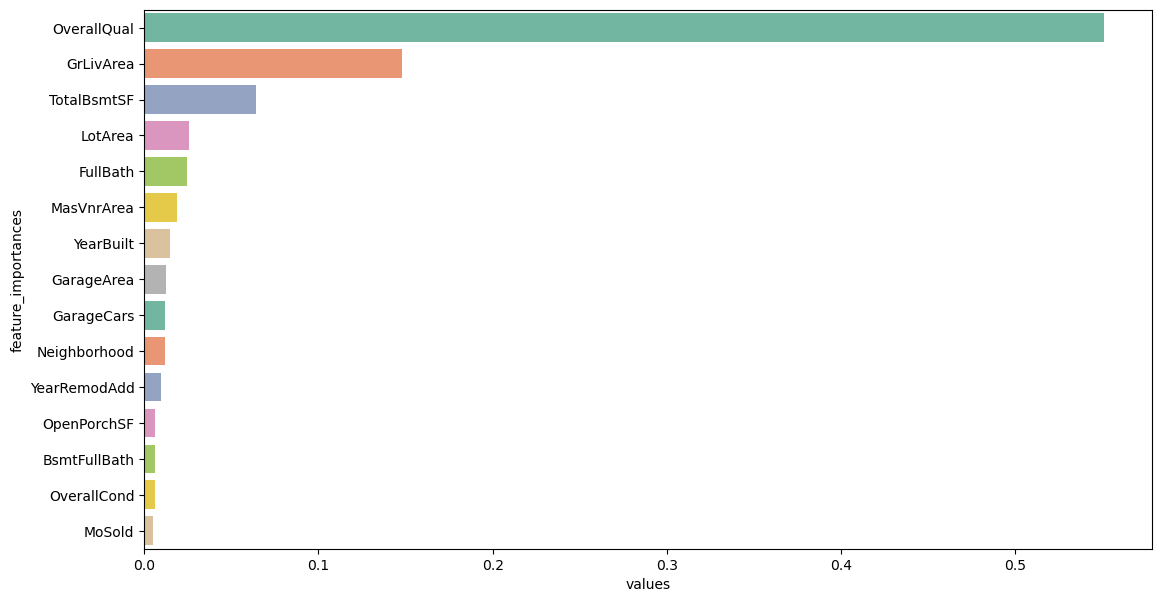

In [61]:
feat = features_importances.reshape(1,features_importances.shape[0])
df_features = pd.DataFrame(data=feat, columns=X.columns).T
df_feat = df_features[0].sort_values(ascending=False)
print('sum of the 15 best variables : ',df_feat[:15].sum())
df = {"feature_importances":df_feat[:15].index,"values":df_feat[:15].values}
cols_importances = df['feature_importances']
fig, ax = plt.subplots(figsize = (13,7))
sns.barplot(df, x= 'values',y =  'feature_importances', palette= sns.color_palette("Set2"))


- The top 10 variables that influences the random forest model score : OverallQual, GrLivArea, TotalBsmtSF, MAsVnrArea, FullBath, GarageCars, LotArea, GarageArea, YearBuilt, BsmtQual
- With 6 cross validation split the avegare of the RMSE is about  29300.44


# Model tfdf

- Let's try the model Tensor Flow Random Forest 

In [62]:
train_df = df_train.sample(frac=0.7)
test_df = df_train.loc[df_train.index.isin(train_df.index) == False]

In [63]:
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
y_true = test_df.SalePrice

In [64]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, task=tfdf.keras.Task.REGRESSION, label="SalePrice")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, task=tfdf.keras.Task.REGRESSION, label="SalePrice")

In [65]:
model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
model.compile(optimizer="Adam",  metrics=["mse"])
fit_model = model.fit(train_ds)

Use /tmp/tmp2nlri4q9 as temporary training directory
Reading training dataset...


Training dataset read in 0:00:03.797701. Found 937 examples.
Training model...


[INFO 24-02-06 17:27:44.7779 CET kernel.cc:1233] Loading model from path /tmp/tmp2nlri4q9/model/ with prefix 3efc6e38d9284808


Model trained in 0:00:00.699144
Compiling model...


[INFO 24-02-06 17:27:45.0146 CET decision_forest.cc:660] Model loaded with 300 root(s), 89148 node(s), and 58 input feature(s).
[INFO 24-02-06 17:27:45.0146 CET abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 24-02-06 17:27:45.0147 CET kernel.cc:1061] Use fast generic engine


Model compiled.


In [66]:
rf_inspector = model.make_inspector()

In [67]:
num_tree = []
rmse = []

for n_tree, error in rf_inspector.training_logs():
    rmse.append(error[3])
    num_tree.append(n_tree)
    

Text(0.5, 0, 'Number_tree')

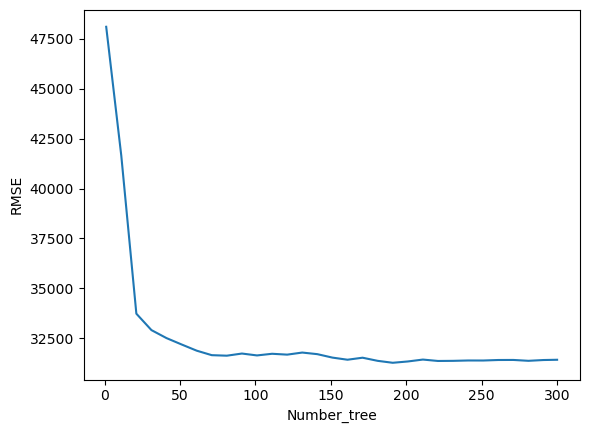

In [68]:
plt.plot(num_tree,rmse)
plt.ylabel('RMSE')
plt.xlabel('Number_tree')

The RMSE decreaise when the number tree are greater than 50

In [69]:
rf_inspector.evaluation()

Evaluation(num_examples=937, accuracy=None, loss=None, rmse=31420.22295082038, ndcg=None, aucs=None, auuc=None, qini=None)

In [70]:
cols = []
values = []
for col, val in rf_inspector.variable_importances()['INV_MEAN_MIN_DEPTH']:
    cols.append(col[0])
    values.append(val)


/tmp/ipykernel_16595/108155578.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= values[:15],y = cols[:15], palette= sns.color_palette("Set2"))
/tmp/ipykernel_16595/108155578.py:2: UserWarning: 
The palette list has fewer values (8) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x= values[:15],y = cols[:15], palette= sns.color_palette("Set2"))


<AxesSubplot:>

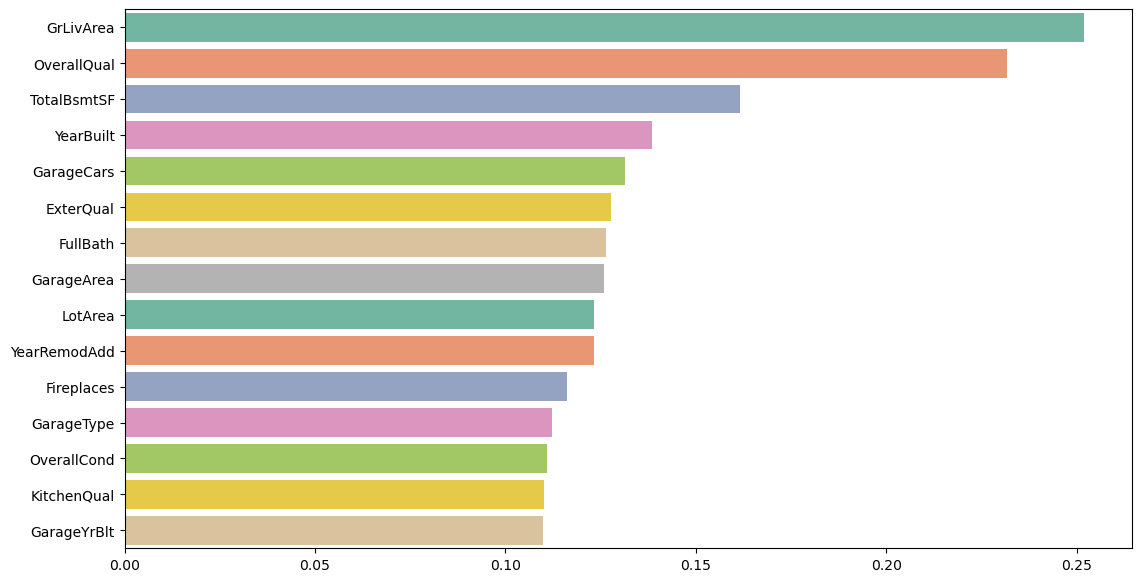

In [71]:
fig, ax = plt.subplots(figsize = (13,7))
sns.barplot(x= values[:15],y = cols[:15], palette= sns.color_palette("Set2"))

The top 15 features importance that influance the performance of the model TFDF

In [72]:
model.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: REGRESSION
Label: "__LABEL"

Input Features (59):
	3SsnPorch
	BedroomAbvGr
	BldgType
	BsmtCond
	BsmtExposure
	BsmtFinType1
	BsmtFinType2
	BsmtFullBath
	BsmtQual
	Condition1
	Electrical
	EnclosedPorch
	ExterCond
	ExterQual
	Exterior1st
	Exterior2nd
	Fireplaces
	Foundation
	FullBath
	Functional
	GarageArea
	GarageCars
	GarageCond
	GarageFinish
	GarageQual
	GarageType
	GarageYrBlt
	GrLivArea
	HalfBath
	HeatingQC
	HouseStyle
	KitchenQual
	LandContour
	LotArea
	LotConfig
	LotShape
	LowQualFinSF
	MSSubClass
	MSZoning
	MasVnrArea
	MiscVal
	MoSold
	Neighborhood
	OpenPorchSF
	OverallCond
	OverallQual
	PavedDrive
	PoolArea
	RoofMatl
	RoofStyle
	SaleCo

In [73]:
y_pred = model.predict(test_ds)
r2_score(y_true=y_true, y_pred=y_pred)


1/1 [==============================] - 0s 104ms/step


0.8383834581266025

In [74]:
model.get_weight_paths()

{'_is_trained': <tf.Variable 'is_trained:0' shape=() dtype=bool, numpy=True>,
 'optimizer._iterations': <tf.Variable 'iteration:0' shape=() dtype=int64, numpy=0>,
 'optimizer._learning_rate': <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>}

In [75]:
sqrt(model.evaluate(x = test_ds)[1])

1/1 [==============================] - 0s 333ms/step - loss: 0.0000e+00 - mse: 1143462912.0000


33815.128448669246

The best RMSE score is 33815.12 with the model TFDF. 

## Data description

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale